# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Silvio Christian, Joe
- **Email:** viochristian12@gmail.com
- **ID Dicoding:** Silvio Christian

## Menentukan Pertanyaan Bisnis

1. Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?
2. Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun
3. Bagaimana korelasi antara suhu terhadap total order bike riding?

## Import Semua Packages/Library yang Digunakan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [11]:
day = pd.read_csv('/content/day.csv')
hour = pd.read_csv('/content/hour.csv')

### Assessing Data

In [12]:
#melihat df
print(day.head())
print(hour.head())

#menghitung jumlah baris setiap DataFrame
print("Jumlah baris di DataFrame day:", day.shape[0])
print("Jumlah baris di DataFrame hour:", hour.shape[0])

#menghitung jumlah kolom setiap DataFrame
print("Jumlah kolom di DataFrame day:", day.shape[1])
print("Jumlah kolom di DataFrame hour:", hour.shape[1])

#menampilkan informasi tentang DataFrame day
print(day.info())
#menampilkan informasi tentang DataFrame hour
print(hour.info())

#melihat apakah ada data yang aneh dari min dan max
#menampilkan deskriptif statistik DataFrame day
print(day.describe())
#menampilkan deskriptif statistik DataFrame hour
print(hour.describe())


# melihat null data
print(day.isnull().sum())
print(hour.isnull().sum())

# melihat duplikat data
print(day.duplicated().sum())
print(hour.duplicated().sum())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

### Cleaning Data

In [13]:
## BERSIHKAN HANYA YANG DAY, KARENA YANG DIPAKAI CUKUP DAY
## Mengubah tipe data pada beberapa kolom
day['dteday'] = pd.to_datetime(day['dteday'])
day['season'] = day.season.astype('category')
day['mnth'] = day.mnth.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['weathersit'] = day.weathersit.astype('category')


# Mengonversi data pada kolom kategori variabel berdasarkan kriteria
# yang ditunjukkan pada file readme.txt
day['season'] = day['season'].replace((1,2,3,4), ('springer', 'summer', 'fall', 'winter'))
day['yr'] = day['yr'].replace((0,1), (2011, 2012))
day['mnth'] = day['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('jan','feb','march','apr','may','june','july','august','sept','okt','nov','dec'))
day['holiday'] = day['holiday'].replace((0,1),('No', 'Yes'))
day['weekday'] = day['weekday'].replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
day['workingday'] = day['workingday'].replace((0,1),('No', 'Yes'))
day['weathersit'] = day['weathersit'].replace((1,2,3,4),('Clear','Misty','Light_RainSnow','Heavy_RainSnow'))

# Drop kolom yang tidak digunakan dalam data
day = day.drop(columns='instant')

# Merubah nama kolom
day = day.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}
)


# Merubah nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi
day['temp'] = day['temp']*41
day['atemp'] = day['atemp']*50
day['humidity'] = day['humidity']*100
day['windspeed'] = day['windspeed']*67

print(day.head())
print(day.info())

        date    season  year month holiday    weekday workingday weather  \
0 2011-01-01  springer  2011   jan      No   Saturday         No   Misty   
1 2011-01-02  springer  2011   jan      No     Sunday         No   Misty   
2 2011-01-03  springer  2011   jan      No     Monday        Yes   Clear   
3 2011-01-04  springer  2011   jan      No    Tuesday        Yes   Clear   
4 2011-01-05  springer  2011   jan      No  Wednesday        Yes   Clear   

        temp     atemp  humidity  windspeed  casual  registered  total_count  
0  14.110847  18.18125   80.5833  10.749882     331         654          985  
1  14.902598  17.68695   69.6087  16.652113     131         670          801  
2   8.050924   9.47025   43.7273  16.636703     120        1229         1349  
3   8.200000  10.60610   59.0435  10.739832     108        1454         1562  
4   9.305237  11.46350   43.6957  12.522300      82        1518         1600  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 7

## Exploratory Data Analysis (EDA)

### Explore ...

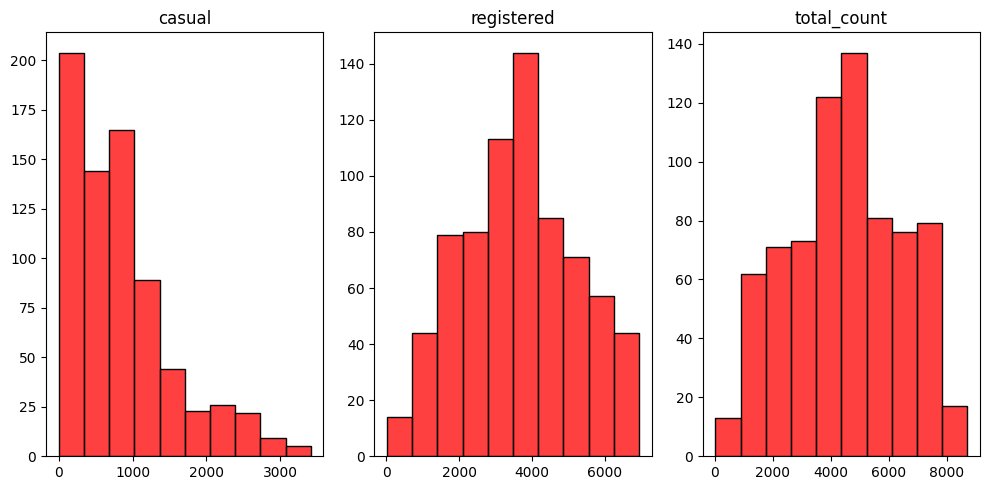

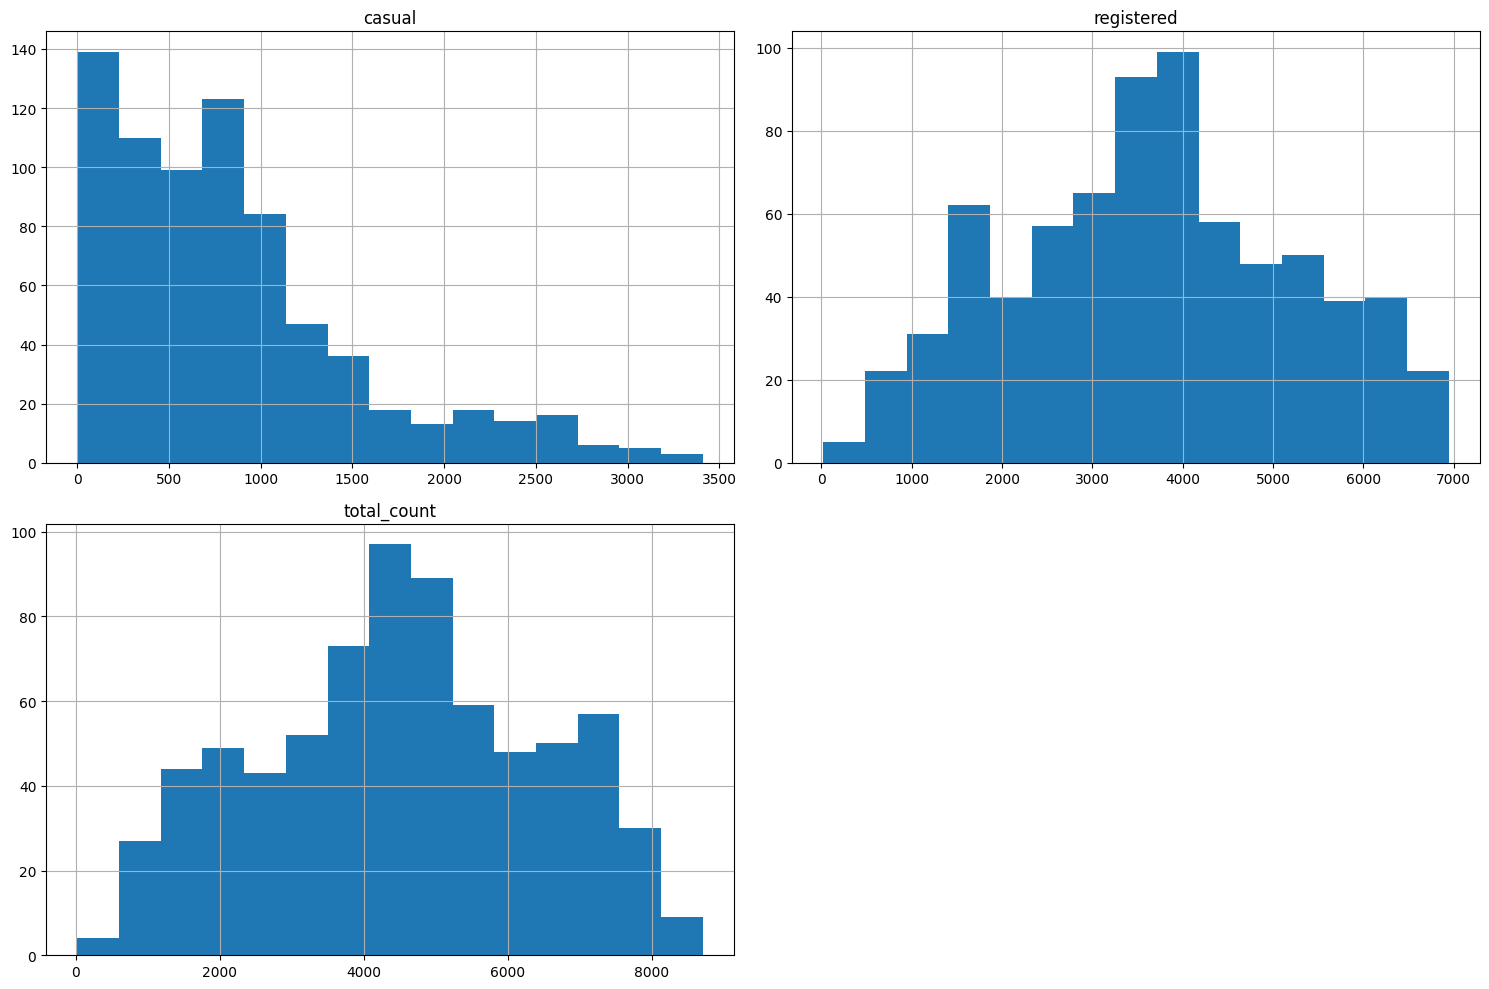

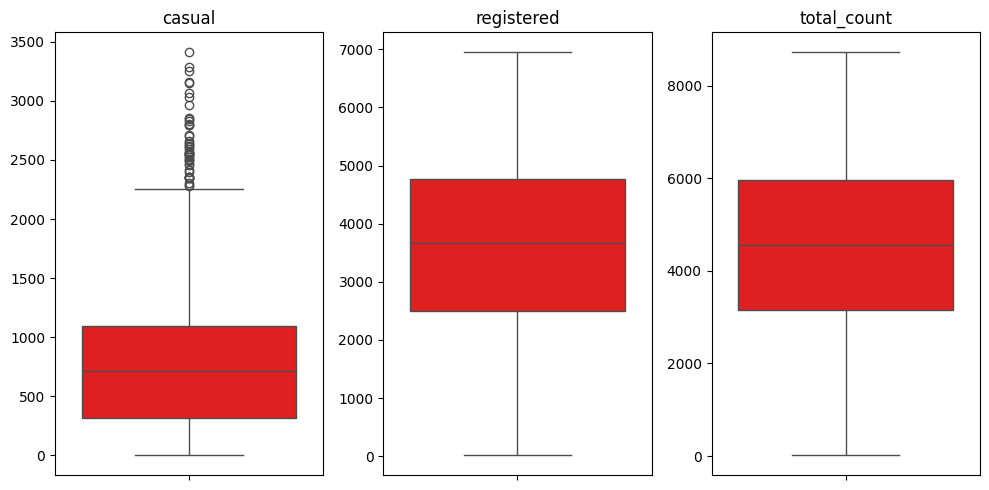

<ipython-input-19-d59c40b6c853>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-19-d59c40b6c853>:33: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


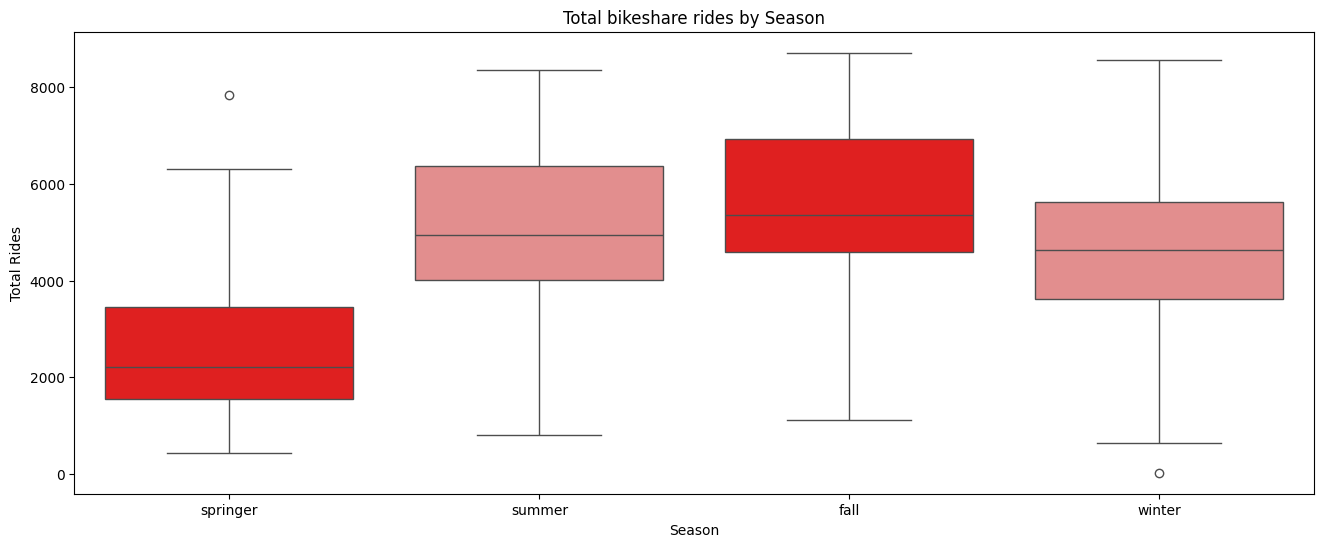

<ipython-input-19-d59c40b6c853>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-19-d59c40b6c853>:50: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


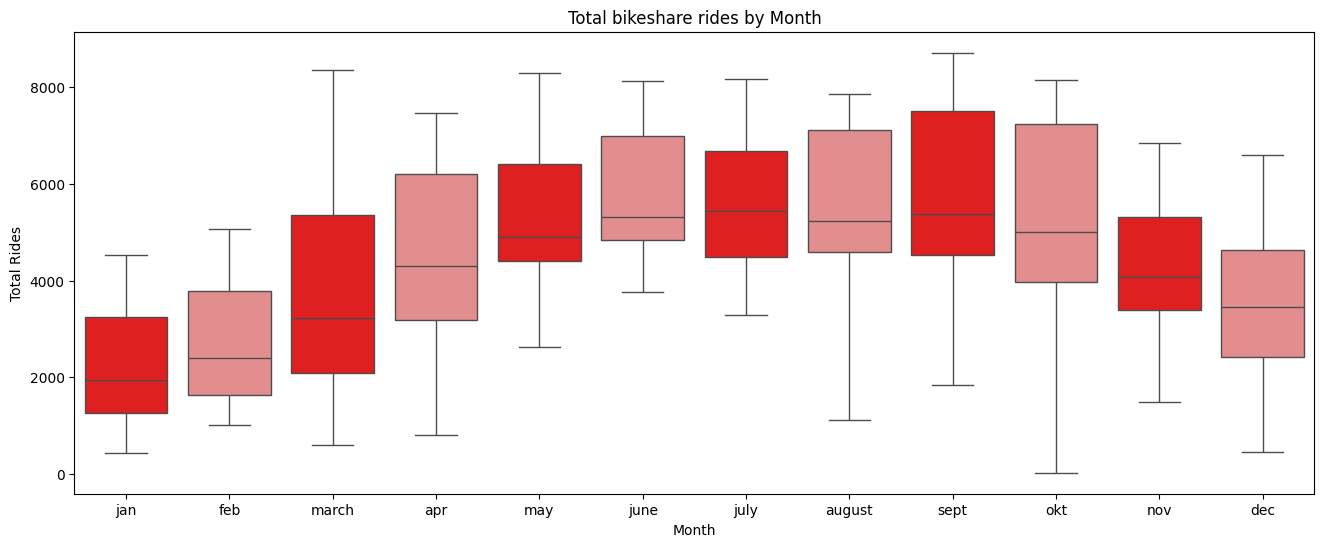

2012-12-31
     customer_id max_order_timestamp  frequency  monetary  recency
0              2          2012-10-29          1        22       63
1              9          2012-12-26          2      1124        5
2             15          2011-01-27          1       431      704
3             25          2011-01-12          1      1162      719
4             34          2011-01-26          1       506      705
..           ...                 ...        ...       ...      ...
601         3155          2012-03-17          1      7836      289
602         3160          2012-09-15          1      8714      107
603         3252          2012-04-07          1      6857      268
604         3283          2012-05-27          1      6591      218
605         3410          2012-05-19          1      8294      226

[606 rows x 5 columns]
2012-12-31
     customer_id max_order_timestamp  frequency  monetary  recency
0             20          2012-10-29          1        22       63
1            416

In [19]:
### EDA
columns = ['casual', 'registered', 'total_count']
fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=day[columns[i]], ax=ax, bins=10, color='red')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()
plt.show()

day[columns].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(10,5))
for i, ax in enumerate(ax):
    sns.boxplot(y=day[columns[i]], ax=ax, color='red')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()
plt.show()
# Histogram untuk casual menunjukkan right-skewed distribution.
# Histogram untuk registered dan total_count menunjukkan distribusi normal.
# Boxplot casual juga menunjukkan adanya outlier.



plt.figure(figsize=(16,6))
# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="total_count",
    data=day,
    palette=["red", "lightcoral"]
)
# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Season")
# Show the plot
plt.show()



plt.figure(figsize=(16,6))
# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="month",
    y="total_count",
    data=day,
    palette=["red", "lightcoral"]
)
# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total bikeshare rides by Month")
# Show the plot
plt.show()


#RFM ANALISIS
### DENGAN CASUAL
rfm_df = day.groupby(by="casual", as_index=False).agg({
    "date": "max", # mengambil tanggal order terakhir
    "total_count": ["nunique", "sum"], # menghitung jumlah order & menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day["date"].dt.date.max()
print(recent_date)

rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
# rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df)




### DENGAN REGISTERED
print('='*90)
rfm_df = day.groupby(by="registered", as_index=False).agg({
    "date": "max", # mengambil tanggal order terakhir
    "total_count": ["nunique", "sum"], # menghitung jumlah order & menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day["date"].dt.date.max()
print(recent_date)

rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
# rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun?

     month  jumlah
0     june  143512
1     july  141341
2   august  136691
3      may  135821
4     sept  127418
5      okt  123511
6      nov  102167
7      apr   94870
8      dec   87323
9    march   64045
10     feb   48215
11     jan   38189
     month  jumlah
0     sept  218573
1   august  214503
2     july  203607
3     june  202830
4      okt  198841
5      may  195865
6      apr  174224
7    march  164875
8      nov  152664
9      dec  123713
10     feb  103137
11     jan   96744


<ipython-input-15-da197227ec36>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulan2021 = day[day['year'] == 2011].groupby('month')['total_count'].sum().reset_index(name='jumlah').sort_values('jumlah', ascending=False).reset_index(drop=True)
<ipython-input-15-da197227ec36>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulan2022 = day[day['year'] == 2012].groupby('month')['total_count'].sum().reset_index(name='jumlah').sort_values('jumlah', ascending=False).reset_index(drop=True)


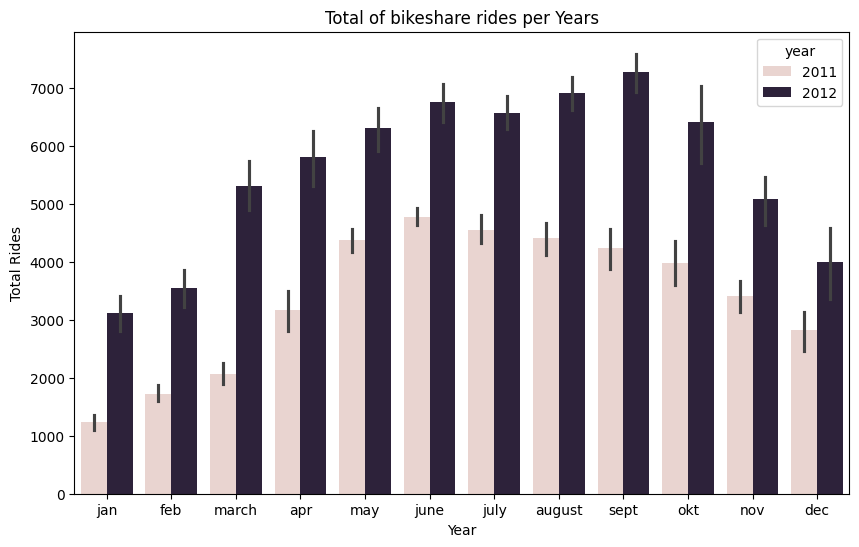

In [15]:
# Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun (2011)?
bulan2021 = day[day['year'] == 2011].groupby('month')['total_count'].sum().reset_index(name='jumlah').sort_values('jumlah', ascending=False).reset_index(drop=True)
print(bulan2021)

# Pada bulan apa bike riding mendapat order terbanyak dalam periode 1 tahun (2012)?
bulan2022 = day[day['year'] == 2012].groupby('month')['total_count'].sum().reset_index(name='jumlah').sort_values('jumlah', ascending=False).reset_index(drop=True)
print(bulan2022)

plt.figure(figsize=(10,6))
sns.barplot(x='month', y='total_count', data=day, hue='year')
plt.xlabel("Year")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Years")
plt.show()

### Pertanyaan 2: Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun

<ipython-input-16-c550cf42255e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  musim2021 = day[day['year'] == 2011].groupby('season')['total_count'].sum().reset_index(name= 'jumlah').sort_values('jumlah', ascending=False).reset_index(drop=True)
<ipython-input-16-c550cf42255e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  musim2022 = day[day['year'] == 2012].groupby('season')['total_count'].sum().reset_index(name= 'jumlah').sort_values('jumlah', ascending=False).reset_index(drop=True)


     season  jumlah
0      fall  419650
1    summer  347316
2    winter  326137
3  springer  150000
     season  jumlah
0      fall  641479
1    summer  571273
2    winter  515476
3  springer  321348


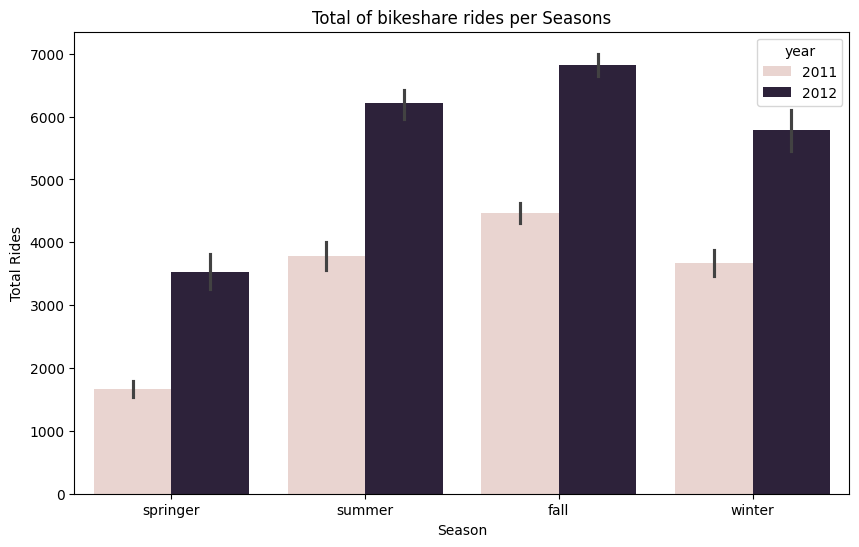

In [16]:
# Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun (2011)?
musim2021 = day[day['year'] == 2011].groupby('season')['total_count'].sum().reset_index(name= 'jumlah').sort_values('jumlah', ascending=False).reset_index(drop=True)
print(musim2021)

# Pada musim apa bike riding mendapat order terbanyak dalam 1 tahun (2012)?
musim2022 = day[day['year'] == 2012].groupby('season')['total_count'].sum().reset_index(name= 'jumlah').sort_values('jumlah', ascending=False).reset_index(drop=True)
print(musim2022)

plt.figure(figsize=(10,6))
sns.barplot(x='season', y='total_count', data=day, hue='year')
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Seasons")
plt.show()

### Pertanyaan 3: Bagaimana korelasi antara suhu terhadap total order bike riding?

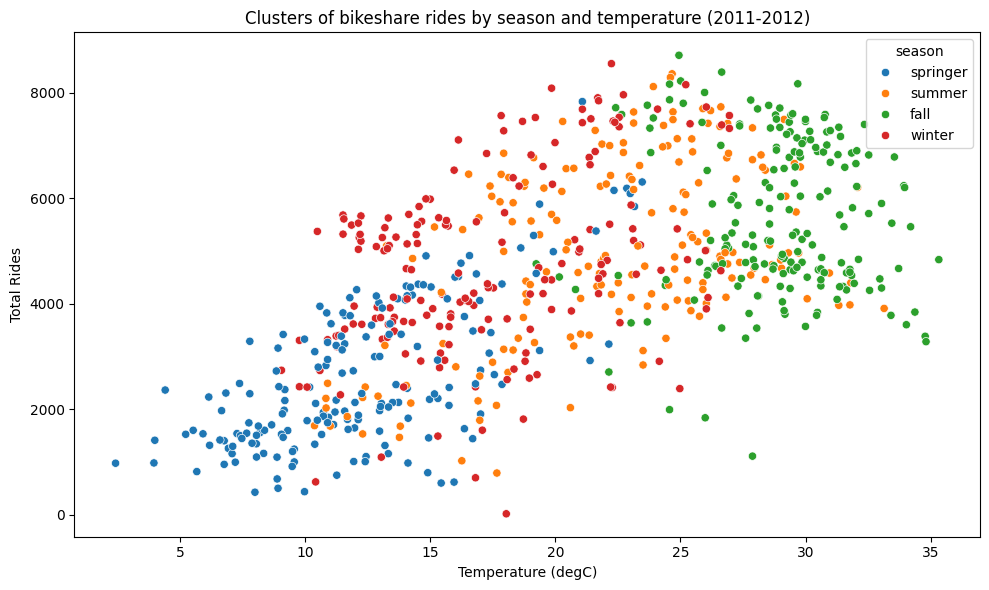

In [17]:
# Bagaimana korelasi antara suhu terhadap total order bike riding?
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='total_count', data=day, hue='season')
plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides by season and temperature (2011-2012)")
# Show the plot
plt.tight_layout()
plt.show()



- Order bikesharing memiliki nilai minimum pada winter.
- Seiring dengan meningkatnya temperatur, permintaan bikesharing semakin meningkat. Permintaan akan bikesharing memiliki nilai tertinggi pada summer.
- Permintaan akan bikesharing memiliki permintaan terbanyak pada rentang suhu 20-30 derajat Celcius atau pada periode summer dan fall.

## Conclusion



1. Order bike riding memiliki order terbanyak secara berturut di bulan Juni dan September pada tahun 2011 dan 2012.
2. Musim fall merupakan musim yang memiliki pengguna bikeriding terbanyak dalam 1 tahun.
3. Hubungannya yaitu:
    * Permintaan akan bikeriding relatif rendah pada suhu kurang dari 20 derajat Celcius.
    - Permintaan bikeriding relatif tinggi ketika pada suhu 25-30 derajat Celcius.




